# Table of Contents
* [1. Pandas](#1.-Pandas)
	* [1.1 DataFrames](#1.1-DataFrames)
		* [1.1.1 Crear un DataFrame](#1.1.1-Crear-un-DataFrame)
	* [1.2 Cargar Datasets mediante Pandas](#1.2-Cargar-Datasets-mediante-Pandas)
	* [1.3 Importación de datos por partes](#1.3-Importación-de-datos-por-partes)
	* [1.4 Exportando DataFrames](#1.4-Exportando-DataFrames)
	* [1.5 Operaciones del álgebra relacional. Función Merge](#1.5-Operaciones-del-álgebra-relacional.-Función-Merge)
	* [1.6 Acceso a los datos (filas y columnas)](#1.6-Acceso-a-los-datos-%28filas-y-columnas%29)
	* [1.7 Actualización de datos de un DataFrame](#1.7-Actualización-de-datos-de-un-DataFrame)
		* [1.7.1 Modificando valores del DataFrame](#1.7.1-Modificando-valores-del-DataFrame)
		* [1.7.2 Borrando columnas en un DataFrame (__pop__ y __drop__)](#1.7.2-Borrando-columnas-en-un-DataFrame-%28__pop__-y-__drop__%29)
		* [1.7.3 Insertar datos en un DataFrame](#1.7.3-Insertar-datos-en-un-DataFrame)
	* [1.8 Tratamiento de valores nulos](#1.8-Tratamiento-de-valores-nulos)
	* [1.9 Consultas](#1.9-Consultas)
	* [1.10 Grupos y funciones de agrupación](#1.10-Grupos-y-funciones-de-agrupación)
	* [1.11 Primeros estadísticos](#1.11-Primeros-estadísticos)
		* [1.11.1 Matriz de correlación](#1.11.1-Matriz-de-correlación)
* [2. Maching Learning](#2.-Maching-Learning)
	* [2.1 Modelo de regresión logística](#2.1-Modelo-de-regresión-logística)
	* [2.2 Predicción con Arboles de decisión](#2.2-Predicción-con-Arboles-de-decisión)
	* [2.3 Predicción con Random Forest](#2.3-Predicción-con-Random-Forest)


# 1. Pandas

La librería __pandas__ de Python proporciona estructuras de datos de alto nivel y herramientas diseñadas específicamente para conseguir un análisis de los datos rápido y sencillo.

* Pandas está construida sobre la librería __NumPy__

__Aspectos más importantes__:
    
* Ofrece una estructurade datos bidimensional : DataFrame
* Filas y  columnas indexadas (Selección de filas y columas a través de su nombre)
* Selección mediante máscaras
* Permite el tratamiento de datos perdidos (missing data)
* Operaciones elemento a elemento (sin iteración al igual que en NumPy)
* Soporta Grupos y operaciones de agrupación
* Amplia gama de operaciones estadísticas (mean, std, corr, etc.)
* Operaciones aritméticas y operaciones del álgebra relacional (Merging, joining, data set concatenation)

In [1]:
import numpy as np
import pandas as pd     # importamos el módulo pandas

## 1.1 DataFrames

La estructura __DataFrame__ está diseñada para manejar datos representados en forma de tabla. Esta será la estructura de datos más habitual.
* Las filas están indexadas.
    * Podemos verlo como filas con nombre. Por defecto, si no decimos otra cosa, dicho nombre será un número entero
* Las columnas están etiquetadas.
    * La etiqueta se corresponde con el nombre de la columna.

Un __DataFrame__ puede verse como una tabla de SQL o una hoja de cálculo.


### 1.1.1 Crear un DataFrame

Hay varias formas de crear un __DataFrame__. Podemos crearlo indicando los datos que contiene y el nombre de las columnas.

In [2]:
# crear un array de tuplas
clientes = ['Rafa','Rafa','Antonio','Pedro','Elena']
importes = [968, 155, 77, 578, 100]

lista_datos = list(zip(clientes, importes))
lista_datos

[('Rafa', 968), ('Rafa', 155), ('Antonio', 77), ('Pedro', 578), ('Elena', 100)]

In [3]:
# crear un DataFrame
tabla = pd.DataFrame( data    = lista_datos,            # lista de tuplas
                      columns = ['Nombres clientes', 'Importe Factura'])  
tabla

,Nombres clientes,Importe Factura
0,Rafa,968
1,Rafa,155
2,Antonio,77
3,Pedro,578
4,Elena,100


La función __describe__ permite hacer un análisis de los datos de cada una de las columnas de la tabla mostrando varias medidas estadísticas. Los datos que muestra son mínimo valor, máximo, media, percentiles, etc. de las columnas numéricas (variables cuantitativas). En caso de las columnas de otro tipo (string, tipo fecha) muestra otro tipo de valores (cantidad de valores, cantidad de valores distintos, etc).

Como podemos ver, el intérprete de Python indexa las filas con un número entero comenzando por el cero (0,1, ...).

In [4]:
tabla.describe()    # por defecto, medidas para variables cuantitativas

,Importe Factura
count,5.000000
mean,375.600000
std,389.128899
min,77.000000
25%,100.000000
50%,155.000000
75%,578.000000
max,968.000000


In [5]:
tabla.describe(include = 'all')       # medidas para todas las variables

,Nombres clientes,Importe Factura
count,5,5.000000
unique,4,NaN
top,Rafa,NaN
freq,2,NaN
mean,NaN,375.600000
std,NaN,389.128899
min,NaN,77.000000
25%,NaN,100.000000
50%,NaN,155.000000
75%,NaN,578.000000


También es posible crear un __DataFrame__ a partir de un diccionario. 
* Las claves del diccionario serán los nombres de las columnas 
* Los valores del diccionario constituirán las filas

In [6]:
datos = {"clientes" : ['Rafa','Rafa','Antonio','Pedro','Elena'], 
         "importes" : [968, 155, 77, 578, 100]
         }
mi_tabla = pd.DataFrame(datos, index = [1971, 1971, 1985, 1985, 1987])
mi_tabla.tail()

,clientes,importes
1971,Rafa,968
1971,Rafa,155
1985,Antonio,77
1985,Pedro,578
1987,Elena,100


In [7]:
mi_tabla.loc[1985]

,clientes,importes
1985,Antonio,77
1985,Pedro,578


* Podemos crear un DataFrame indexando las filas con un tipo de dato que no sea por defecto (int).
* Podemos crear un DataFrame cambiando la posición de las columnas, incluso con menos columnas.

En el caso de DataFrames, los principales atributos son los siguientes:

* __columns__ : devuelve las etiquetas de las columnas del DataFrame
* __index__ : devuelve los índices de las filas del DataFrame
* __values__ : devuelve los datos del DataFrame. 


In [8]:
mi_tabla.columns

Index(['clientes', 'importes'], dtype='object')

In [9]:
mi_tabla.index

Int64Index([1971, 1971, 1985, 1985, 1987], dtype='int64')

Los datos del DateFrame se pueden obtener usando el atributo __values__. El resultado será un array de NumPy:

In [10]:
mi_tabla.values

array([['Rafa', 968],
       ['Rafa', 155],
       ['Antonio', 77],
       ['Pedro', 578],
       ['Elena', 100]], dtype=object)

In [11]:
type(mi_tabla.values)

numpy.ndarray

## 1.2 Cargar Datasets mediante Pandas

Pandas es capaz de leer datos de ficheros en formatos:
     * csv, 
     * txt,
     * excel, 
     * json, 
     * html,
     * xml, 
     * ...

Las funciones  más utilizadas en pandas para leer datos en formato texto son __read_csv__ y __read_table__. Estas funciones ofrecen una gran flexibilidad a la hora de leer un fichero de texto plano.

__Ejemplo 1__

El dataset [HR_comma.csv  (612 KB)](./datos/HR_comma.csv) contiene ciertos registros relacionados con los empleados de una empresa de los últimos 5 años.

In [12]:
tabla = pd.read_csv('./datos/HR_comma.csv')
tabla.head(6)    # muestro solo las 6 primeras entradas

,nivel_de_satisfaccion,ultima_encuesta,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep,salario
0,0.38,0.53,2.0,157,3,0,1.0,0,sales,low
1,0.80,0.86,5.0,262,6,0,1.0,0,sales,medium
2,0.11,0.88,7.0,272,4,0,1.0,0,NaN,medium
3,0.72,0.87,5.0,223,5,0,1.0,0,sales,low
4,0.37,0.52,NaN,159,3,0,1.0,0,sales,low
5,0.41,0.50,2.0,153,3,0,1.0,0,sales,low


Podemos preguntar por la forma que tiene el DataFrame:

In [13]:
tabla.shape       # informa del número de filas y columnas

(14999, 10)

La función __info__ nos proporciona más información. Nombre de las variables, su tipo, el número de valores no nulos, etc.

In [14]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
nivel_de_satisfaccion    14999 non-null float64
ultima_encuesta          14999 non-null float64
numero_de_proyectos      14998 non-null float64
media_horas_mes          14999 non-null int64
horas_en_la_empresa      14999 non-null int64
accidente_de_trabajo     14999 non-null int64
deja_la_empresa          14998 non-null float64
promociona               14999 non-null int64
dep                      14998 non-null object
salario                  14997 non-null object
dtypes: float64(4), int64(4), object(2)
memory usage: 1.1+ MB


In [15]:
tabla.describe()

C:\Users\Yoli\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,nivel_de_satisfaccion,ultima_encuesta,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona
count,14999.000000,14999.000000,14998.000000,14999.000000,14999.000000,14999.000000,14998.000000,14999.000000
mean,0.612834,0.716102,3.803174,201.050337,3.498233,0.144610,0.238032,0.021268
std,0.248631,0.171169,1.232546,49.943099,1.460136,0.351719,0.425893,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,NaN,156.000000,3.000000,0.000000,NaN,0.000000
50%,0.640000,0.720000,NaN,200.000000,3.000000,0.000000,NaN,0.000000
75%,0.820000,0.870000,NaN,245.000000,4.000000,0.000000,NaN,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


__Ejemplo 2:__

Si no nos interesan todas las columnas, podemos indicar mediante una lista las columnas en las que estamos interesados.

In [16]:
columnas_carga = ['nivel_de_satisfaccion', 'numero_de_proyectos', 'dep', 'salario' ]
tabla = pd.read_csv('./datos/HR_comma.csv',
                     usecols = columnas_carga )

tabla.head(6)    # muestro solo las 6 primeras entradas

,nivel_de_satisfaccion,numero_de_proyectos,dep,salario
0,0.38,2.0,sales,low
1,0.80,5.0,sales,medium
2,0.11,7.0,NaN,medium
3,0.72,5.0,sales,low
4,0.37,NaN,sales,low
5,0.41,2.0,sales,low


__Ejemplo 3:__

También nos puede interesar que alguna de las columnas sea el índice de la tabla. Por ejemplo, la columna de departamento.

In [17]:
columnas_carga = ['nivel_de_satisfaccion', 'numero_de_proyectos', 'dep', 'salario' ]
tabla = pd.read_csv('./datos/HR_comma.csv',
                     usecols = columnas_carga, 
                     index_col = [2])

tabla.tail(15)    # muestro solo las 15 últimas filas

,nivel_de_satisfaccion,numero_de_proyectos,salario
dep,,,
technical,0.40,2.0,medium
technical,0.91,5.0,medium
technical,0.85,4.0,low
technical,0.90,5.0,low
technical,0.46,2.0,low
technical,0.43,2.0,low
support,0.89,5.0,low
support,0.09,6.0,low
support,0.40,2.0,low


__Ejemplo 4:__

Movilens Dataset recoge datos películas, valoraciones y etiquetas. La información se distribuye en 3 tablas.

- ratings.dat (252 MB)) - El fichero recoge 10.000.054  valoraciones  de los usuarios
- [tags.dat](./datos/ml-10M/movies.dat) (3.5 MB) - Contiene 95.580 etiquetas 
- movies.dat (510 KB) - Datos de 10.681 películas

Toda esta información ha sido recogida por el sistema de recomendación online MovieLens y se utiliza con mucha frecuencia en los sistemas de recomendación que aplican algoritmos de aprendizaje.

La url para descargar los datos:     http://grouplens.org/datasets/movielens/

In [18]:
ruta_ratings = './datos/ml-10M/ratings.dat'
ruta_movies = './datos/ml-10M/movies.dat'
ruta_tags = './datos/ml-10M/tags.dat'

Tenemos la posibilidad de cargar solo algunas filas, para ver el aspecto de los datos.

In [19]:
# Parseo de fechas 
from datetime import datetime
dateparse = lambda x: datetime.fromtimestamp(float(x))

df_ratings = pd.read_csv(ruta_ratings, sep = '::', header = None,
                         names = ['UserID', 'MovieID', 'Starts', 'Date'],
                         engine ='python',
                  #      nrows = 3000,
                         parse_dates=[3], date_parser=dateparse) 

In [20]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000054 entries, 0 to 10000053
Data columns (total 4 columns):
UserID     int64
MovieID    int64
Starts     float64
Date       datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 305.2 MB


In [21]:
df_ratings.head()

,UserID,MovieID,Starts,Date
0,1,122,5.0,1996-08-02 13:24:06
1,1,185,5.0,1996-08-02 12:58:45
2,1,231,5.0,1996-08-02 12:56:32
3,1,292,5.0,1996-08-02 12:57:01
4,1,316,5.0,1996-08-02 12:56:32


__Ejemplo:__

In [22]:
# Parseo de fechas 
from datetime import datetime
dateparse = lambda x: datetime.fromtimestamp(float(x))

df_ratings_2 = pd.read_csv(ruta_ratings, sep = '::', header = None,
                         names = ['id_usuario', 'id_peli', 'puntuacion', 'Fecha'],
                         engine ='python',
                         nrows = 3000,
                         index_col =['id_usuario', 'id_peli'],
                         parse_dates=[3], date_parser=dateparse) 

In [23]:
df_ratings_2

puntuacion               Fecha
id_usuario id_peli                                
1          122             5.0 1996-08-02 13:24:06
           185             5.0 1996-08-02 12:58:45
           231             5.0 1996-08-02 12:56:32
           292             5.0 1996-08-02 12:57:01
           316             5.0 1996-08-02 12:56:32
           329             5.0 1996-08-02 12:56:32
           355             5.0 1996-08-02 13:14:34
           356             5.0 1996-08-02 13:00:53
           362             5.0 1996-08-02 13:21:25
           364             5.0 1996-08-02 13:01:47
           370             5.0 1996-08-02 13:16:36
           377             5.0 1996-08-02 13:03:54
           420             5.0 1996-08-02 13:03:54
           466             5.0 1996-08-02 13:17:59
           480             5.0 1996-08-02 13:00:53
           520             5.0 1996-08-02 13:17:59
           539             5.0 1996-08-02 13:07:48
           586             5.0 1996-08-02 13:07:48
           588             5.0 1996-08-02 12:55:39
           589             5.0 1996-08-02 13:02:58
           594             5.0 1996-08-02 13:17:59
           616             5.0 1996-08-02 13:22:21
2          110             5.0 1997-07-07 05:22:57
           151             3.0 1997-07-07 05:34:10
           260             5.0 1997-07-07 05:02:42
           376             3.0 1997-07-07 05:25:20
           539             3.0 1997-07-07 05:31:02
           590             5.0 1997-07-07 05:20:08
           648             2.0 1997-07-07 05:04:59
           719             3.0 1997-07-07 05:29:51
...                        ...                 ...
34         474             4.0 2001-02-18 16:38:43
           479             3.0 2001-02-10 18:29:36
           480             4.0 2001-02-10 18:06:33
           481             2.0 2001-02-10 18:09:35
           485             2.0 2001-02-18 17:15:52
           491             4.0 2001-02-10 18:09:11
           493             2.0 2001-02-07 16:55:28
           500             3.0 2001-02-10 18:11:41
           502             2.0 2001-02-18 17:16:21
           504             2.0 2001-02-18 17:08:42
           505             2.0 2001-02-18 17:15:52
           508             3.0 2001-02-10 18:03:57
           509             2.0 2001-02-18 16:56:38
           511             3.0 2001-02-18 16:51:18
           516             3.0 2001-02-18 16:59:19
           517             2.0 2001-02-18 17:02:13
           520             1.0 2001-02-18 17:01:38
           524             3.0 2001-02-10 18:05:53
           527             5.0 2001-02-07 16:43:01
           528             1.0 2001-02-18 17:10:55
           529             3.0 2001-02-18 16:39:21
           531             3.0 2001-02-18 16:35:32
           539             3.0 2001-02-10 18:12:24
           540             3.0 2001-02-18 17:19:57
           541             3.0 2001-02-07 16:39:55
           542             4.0 2001-02-10 18:32:25
           546             1.0 2001-02-18 17:21:41
           547             3.0 2001-02-18 17:08:02
           551             3.0 2001-02-07 16:57:16
           552             4.0 2001-02-10 18:14:39

[3000 rows x 2 columns]

## 1.3 Importación de datos por partes

Cuando los ficheros de datos que queremos importar son muy grandes, es posible procesar solo una parte de los datos y repetir el proceso para el resto. Usamos la opción __chunksize__ para especificar el número de filas.

En el siguiente ejemplo, leemos el fichero [HR_comma.csv](./datos/HR_comma.csv) por trozos y procesamos cada uno de ellos. Por ejemplo seleccionamos solo las entradas asociadas al departamento `ventas` .

In [24]:
bloque = pd.read_csv('./datos/HR_comma.csv',
                     chunksize = 100)     # tamaño del bloque leído es: 100
                         
tabla_resultado = pd.DataFrame([])             # creamos un DataFrame vacío

# bucle para procesar cada uno de los bloques: 
for t in bloque:                           # t es un dataframe de 100 filas
    cuatro = t[t.dep == 'sales']
    tabla_resultado = pd.concat([tabla_resultado, cuatro])
    
    
len(tabla_resultado)

4139

## 1.4 Exportando DataFrames

Para exportar un DataFrame a un fichero con extensión __csv__  utilizamos la función [__to_csv__](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html). Para exportar un DataFrame a un fichero con extensión __xlsx__ utilizamos la función __to_excel__:
* Ambas funciones admiten una gran cantidad de parámetros. Opcionalmente podemos generar un fichero csv/xlsx con cabeceras o sin ellas, con índices o sin ellos.

In [25]:
tabla_resultado.to_excel('./datos/HR_coma_sales.xlsx',
                      header = True, index = False)

## 1.5 Operaciones del álgebra relacional. Función Merge

Es la operación __join__ al estilo del álgebra relacional. Permite combinar filas  de dos o más tablas (DataFrames) basándose en una o varias claves. 
Hay tres tipos de __merge__: 
    * interno (inner), 
    * externo (outer), 
    * cruzado(left, right)
    
![Entorno](./images/joins.png "inner")

In [26]:
df_ratings.head()

,UserID,MovieID,Starts,Date
0,1,122,5.0,1996-08-02 13:24:06
1,1,185,5.0,1996-08-02 12:58:45
2,1,231,5.0,1996-08-02 12:56:32
3,1,292,5.0,1996-08-02 12:57:01
4,1,316,5.0,1996-08-02 12:56:32


In [27]:
df_movies = pd.read_csv(ruta_movies, sep = '::', header = None,
                         names = [ 'MovieID', 'Title', 'Genres'],
                         engine ='python') 
                                                
df_movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [28]:
result = pd.merge(df_ratings, df_movies, on=['MovieID'])               
result.head()

,UserID,MovieID,Starts,Date,Title,Genres
0,1,122,5.0,1996-08-02 13:24:06,Boomerang (1992),Comedy|Romance
1,139,122,3.0,2000-11-15 16:37:01,Boomerang (1992),Comedy|Romance
2,149,122,2.5,2005-04-01 09:58:42,Boomerang (1992),Comedy|Romance
3,182,122,3.0,1999-11-24 16:53:04,Boomerang (1992),Comedy|Romance
4,215,122,4.5,2004-12-08 09:12:27,Boomerang (1992),Comedy|Romance


## 1.6 Acceso a los datos (filas y columnas)

Para acceder a las columnas, podemos usar la notación '.' (como si fuera un atributo) o con la notación empleada en los diccionarios, utilizando como clave el nombre de la columna.

In [29]:
tabla = pd.read_csv('./datos/HR_comma.csv')
tabla.head()

,nivel_de_satisfaccion,ultima_encuesta,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep,salario
0,0.38,0.53,2.0,157,3,0,1.0,0,sales,low
1,0.80,0.86,5.0,262,6,0,1.0,0,sales,medium
2,0.11,0.88,7.0,272,4,0,1.0,0,NaN,medium
3,0.72,0.87,5.0,223,5,0,1.0,0,sales,low
4,0.37,0.52,NaN,159,3,0,1.0,0,sales,low


In [30]:
tabla.salario

0           low
1        medium
2        medium
3           low
4           low
5           low
6           low
7           low
8           low
9           low
10          low
11          NaN
12          low
13          low
14          low
15          NaN
16          low
17          low
18          low
19          low
20          low
21          low
22          low
23          low
24          low
25          low
26          low
27          low
28          low
29          low
          ...  
14969    medium
14970    medium
14971    medium
14972    medium
14973    medium
14974    medium
14975    medium
14976    medium
14977    medium
14978    medium
14979    medium
14980      high
14981       low
14982    medium
14983    medium
14984    medium
14985    medium
14986       low
14987       low
14988       low
14989       low
14990       low
14991       low
14992       low
14993       low
14994       low
14995       low
14996       low
14997       low
14998       low
Name: salario, dtype: ob

In [31]:
tabla[ 'salario' ]    #  Acceso utilizando notación corchetes 

0           low
1        medium
2        medium
3           low
4           low
5           low
6           low
7           low
8           low
9           low
10          low
11          NaN
12          low
13          low
14          low
15          NaN
16          low
17          low
18          low
19          low
20          low
21          low
22          low
23          low
24          low
25          low
26          low
27          low
28          low
29          low
          ...  
14969    medium
14970    medium
14971    medium
14972    medium
14973    medium
14974    medium
14975    medium
14976    medium
14977    medium
14978    medium
14979    medium
14980      high
14981       low
14982    medium
14983    medium
14984    medium
14985    medium
14986       low
14987       low
14988       low
14989       low
14990       low
14991       low
14992       low
14993       low
14994       low
14995       low
14996       low
14997       low
14998       low
Name: salario, dtype: ob

En Pandas se utiliza la función __loc__ para realizar un accceso a los datos más eficiente que las notaciones anteriores.

```
loc[filas, columnas]

```

In [32]:
resultado = tabla.loc[:, ['nivel_de_satisfaccion','salario']]  #acceso más eficiente
resultado.head()

,nivel_de_satisfaccion,salario
0,0.38,low
1,0.80,medium
2,0.11,medium
3,0.72,low
4,0.37,low


Podemos obtener los valores distintos que toma una variable categórica mediante la función __unique()__.

In [33]:
tabla.salario.unique()      

array(['low', 'medium', nan, 'high'], dtype=object)

Si queremos saber el número de empleados para cada uno de los valores de salario, podemos obtenerlo mediante la función __value_counts()__.

In [34]:
tabla.salario.value_counts()

low       7314
medium    6446
high      1237
Name: salario, dtype: int64

In [35]:
# Visualizar diagrama de barras
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
serie = tabla.salario.value_counts()

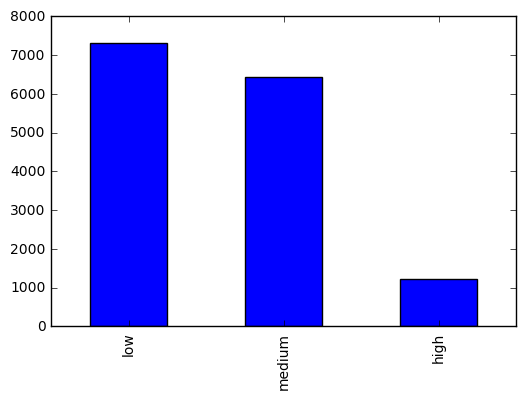

In [36]:
serie.plot(kind='bar');

## 1.7 Actualización de datos de un DataFrame

### 1.7.1 Modificando valores del DataFrame

Para actualizar los datos de una columna podemos utilizar un valor concreto:

In [37]:
# Si no existe la variable `sexo` la crea
# Si exite la modifica
tabla['sexo'] = 'M'
tabla.head()

,nivel_de_satisfaccion,ultima_encuesta,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep,salario,sexo
0,0.38,0.53,2.0,157,3,0,1.0,0,sales,low,M
1,0.80,0.86,5.0,262,6,0,1.0,0,sales,medium,M
2,0.11,0.88,7.0,272,4,0,1.0,0,NaN,medium,M
3,0.72,0.87,5.0,223,5,0,1.0,0,sales,low,M
4,0.37,0.52,NaN,159,3,0,1.0,0,sales,low,M


Modifica una columna existente:

In [38]:
tabla['numero_de_proyectos'] = tabla['numero_de_proyectos'] + 1
tabla.head()

,nivel_de_satisfaccion,ultima_encuesta,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep,salario,sexo
0,0.38,0.53,3.0,157,3,0,1.0,0,sales,low,M
1,0.80,0.86,6.0,262,6,0,1.0,0,sales,medium,M
2,0.11,0.88,8.0,272,4,0,1.0,0,NaN,medium,M
3,0.72,0.87,6.0,223,5,0,1.0,0,sales,low,M
4,0.37,0.52,NaN,159,3,0,1.0,0,sales,low,M


> Las operaciones sobre DataFrames son vectorizadas, al igual que ocurría con las operaciones sobre los objetos ndarray de NumPy.

__Ejemplo__:

Podemos crear una nueva columna en el DataFrame, cuyos valores se obtengan a partir del `salario`.

In [39]:
def salario2euros(val):
    if val == 'medium':
        return 200
    elif val == 'low':
        return 100
    elif val == 'high':
        return 300
    else:
        pass

tabla['salario €'] = tabla.salario.apply(salario2euros)
tabla.head()

,nivel_de_satisfaccion,ultima_encuesta,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep,salario,sexo,salario €
0,0.38,0.53,3.0,157,3,0,1.0,0,sales,low,M,100.0
1,0.80,0.86,6.0,262,6,0,1.0,0,sales,medium,M,200.0
2,0.11,0.88,8.0,272,4,0,1.0,0,NaN,medium,M,200.0
3,0.72,0.87,6.0,223,5,0,1.0,0,sales,low,M,100.0
4,0.37,0.52,NaN,159,3,0,1.0,0,sales,low,M,100.0


### 1.7.2 Borrando columnas en un DataFrame (__pop__ y __drop__)

La función __pop__ borra la columna especificada del DataFrame y guarda la columna borrada en un objeto de tipo __Serie__.
- Modifica el DataFrame

La función __drop__ permite borrar tanto filas como columnas.
- No modifica el DataFrame. Devuelve el resultado en un nuevo DataFrame.
- No permite acceder a los elementos borrados.

In [40]:
columna_sexo = tabla.pop('sexo')
columna_sexo

0        M
1        M
2        M
3        M
4        M
5        M
6        M
7        M
8        M
9        M
10       M
11       M
12       M
13       M
14       M
15       M
16       M
17       M
18       M
19       M
20       M
21       M
22       M
23       M
24       M
25       M
26       M
27       M
28       M
29       M
        ..
14969    M
14970    M
14971    M
14972    M
14973    M
14974    M
14975    M
14976    M
14977    M
14978    M
14979    M
14980    M
14981    M
14982    M
14983    M
14984    M
14985    M
14986    M
14987    M
14988    M
14989    M
14990    M
14991    M
14992    M
14993    M
14994    M
14995    M
14996    M
14997    M
14998    M
Name: sexo, dtype: object

In [41]:
tabla.head()     # ha desaparecido la columna 'sexo'

,nivel_de_satisfaccion,ultima_encuesta,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep,salario,salario €
0,0.38,0.53,3.0,157,3,0,1.0,0,sales,low,100.0
1,0.80,0.86,6.0,262,6,0,1.0,0,sales,medium,200.0
2,0.11,0.88,8.0,272,4,0,1.0,0,NaN,medium,200.0
3,0.72,0.87,6.0,223,5,0,1.0,0,sales,low,100.0
4,0.37,0.52,NaN,159,3,0,1.0,0,sales,low,100.0


También es posible utilizar la función __drop__ para eliminar tanto filas como columnas.

In [42]:
# borramos las filas correspondientes a las etiquetas 0 y 3
nuevo_df = tabla.drop([0,3])
nuevo_df.head()

,nivel_de_satisfaccion,ultima_encuesta,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep,salario,salario €
1,0.80,0.86,6.0,262,6,0,1.0,0,sales,medium,200.0
2,0.11,0.88,8.0,272,4,0,1.0,0,NaN,medium,200.0
4,0.37,0.52,NaN,159,3,0,1.0,0,sales,low,100.0
5,0.41,0.50,3.0,153,3,0,1.0,0,sales,low,100.0
6,0.10,0.77,7.0,247,4,0,1.0,0,sales,low,100.0


In [43]:
tabla.head()     # ojo, después de borrar, la tabla original no se modofica

,nivel_de_satisfaccion,ultima_encuesta,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep,salario,salario €
0,0.38,0.53,3.0,157,3,0,1.0,0,sales,low,100.0
1,0.80,0.86,6.0,262,6,0,1.0,0,sales,medium,200.0
2,0.11,0.88,8.0,272,4,0,1.0,0,NaN,medium,200.0
3,0.72,0.87,6.0,223,5,0,1.0,0,sales,low,100.0
4,0.37,0.52,NaN,159,3,0,1.0,0,sales,low,100.0


Para borrar columnas, es necesario indicar en la llamada a la función que queremos actura sobre el eje 1 ( axis = 1 ),  que se corresponde con las columnas.

In [44]:
# borramos dos columnas
otro = tabla.drop(['nivel_de_satisfaccion', 'ultima_encuesta'], axis = 1)
otro.head()

,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep,salario,salario €
0,3.0,157,3,0,1.0,0,sales,low,100.0
1,6.0,262,6,0,1.0,0,sales,medium,200.0
2,8.0,272,4,0,1.0,0,NaN,medium,200.0
3,6.0,223,5,0,1.0,0,sales,low,100.0
4,NaN,159,3,0,1.0,0,sales,low,100.0


### 1.7.3 Insertar datos en un DataFrame

Podemos utilizar la función __insert__ para insertar la columna `sexo` que hemos eliminado anteriormente en una determinada posición.

In [45]:
# inserta la columna en la segunda posición 
tabla.insert(2, 'Sexo_empleado', columna_sexo)
tabla.head()

,nivel_de_satisfaccion,ultima_encuesta,Sexo_empleado,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep,salario,salario €
0,0.38,0.53,M,3.0,157,3,0,1.0,0,sales,low,100.0
1,0.80,0.86,M,6.0,262,6,0,1.0,0,sales,medium,200.0
2,0.11,0.88,M,8.0,272,4,0,1.0,0,NaN,medium,200.0
3,0.72,0.87,M,6.0,223,5,0,1.0,0,sales,low,100.0
4,0.37,0.52,M,NaN,159,3,0,1.0,0,sales,low,100.0


## 1.8 Tratamiento de valores nulos

El término valores perdidos (missing values) se refiere a los valores que no aparecen o que se encuentran marcados con un valor por defecto.
En pandas estos valores vienen marcados como NaN.

Una de las opciones para filtrar estos valores es la función __dropna__.

In [46]:
tabla.head()

,nivel_de_satisfaccion,ultima_encuesta,Sexo_empleado,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep,salario,salario €
0,0.38,0.53,M,3.0,157,3,0,1.0,0,sales,low,100.0
1,0.80,0.86,M,6.0,262,6,0,1.0,0,sales,medium,200.0
2,0.11,0.88,M,8.0,272,4,0,1.0,0,NaN,medium,200.0
3,0.72,0.87,M,6.0,223,5,0,1.0,0,sales,low,100.0
4,0.37,0.52,M,NaN,159,3,0,1.0,0,sales,low,100.0


In [47]:
tabla_sinNAN = tabla.dropna()
tabla_sinNAN.head()

,nivel_de_satisfaccion,ultima_encuesta,Sexo_empleado,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep,salario,salario €
0,0.38,0.53,M,3.0,157,3,0,1.0,0,sales,low,100.0
1,0.80,0.86,M,6.0,262,6,0,1.0,0,sales,medium,200.0
3,0.72,0.87,M,6.0,223,5,0,1.0,0,sales,low,100.0
5,0.41,0.50,M,3.0,153,3,0,1.0,0,sales,low,100.0
6,0.10,0.77,M,7.0,247,4,0,1.0,0,sales,low,100.0


In [48]:
tabla.head()

,nivel_de_satisfaccion,ultima_encuesta,Sexo_empleado,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep,salario,salario €
0,0.38,0.53,M,3.0,157,3,0,1.0,0,sales,low,100.0
1,0.80,0.86,M,6.0,262,6,0,1.0,0,sales,medium,200.0
2,0.11,0.88,M,8.0,272,4,0,1.0,0,NaN,medium,200.0
3,0.72,0.87,M,6.0,223,5,0,1.0,0,sales,low,100.0
4,0.37,0.52,M,NaN,159,3,0,1.0,0,sales,low,100.0


En los casos en los no deseamos eliminar filas con valores NaN, podemos sustituir los valores NaN por un valor por defecto. Para ello usamos la función __fillna()__.
* Si queremos un valor por defecto para cada variable, usaremos un diccionario como parámetro de __fillna__.

In [49]:
# Podemos ver las variables que tienen nulos
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 12 columns):
nivel_de_satisfaccion    14999 non-null float64
ultima_encuesta          14999 non-null float64
Sexo_empleado            14999 non-null object
numero_de_proyectos      14998 non-null float64
media_horas_mes          14999 non-null int64
horas_en_la_empresa      14999 non-null int64
accidente_de_trabajo     14999 non-null int64
deja_la_empresa          14998 non-null float64
promociona               14999 non-null int64
dep                      14998 non-null object
salario                  14997 non-null object
salario €                14997 non-null float64
dtypes: float64(5), int64(4), object(3)
memory usage: 1.4+ MB


In [50]:
valores = {'numero_de_proyectos': 0, 'dep' : 'otros'}
tabla.fillna(valores).head()

,nivel_de_satisfaccion,ultima_encuesta,Sexo_empleado,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep,salario,salario €
0,0.38,0.53,M,3.0,157,3,0,1.0,0,sales,low,100.0
1,0.80,0.86,M,6.0,262,6,0,1.0,0,sales,medium,200.0
2,0.11,0.88,M,8.0,272,4,0,1.0,0,otros,medium,200.0
3,0.72,0.87,M,6.0,223,5,0,1.0,0,sales,low,100.0
4,0.37,0.52,M,0.0,159,3,0,1.0,0,sales,low,100.0


In [51]:
tabla.head()     # cuidado: fillna no modifica la tabla

,nivel_de_satisfaccion,ultima_encuesta,Sexo_empleado,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep,salario,salario €
0,0.38,0.53,M,3.0,157,3,0,1.0,0,sales,low,100.0
1,0.80,0.86,M,6.0,262,6,0,1.0,0,sales,medium,200.0
2,0.11,0.88,M,8.0,272,4,0,1.0,0,NaN,medium,200.0
3,0.72,0.87,M,6.0,223,5,0,1.0,0,sales,low,100.0
4,0.37,0.52,M,NaN,159,3,0,1.0,0,sales,low,100.0


## 1.9 Consultas

La sección de partes de un DataFrame se realiza mediante máscaras. Veamos algunos ejemplos:

* Selección de tuplas con nivel de satisfacción superior a 0.5

In [52]:
mascara = tabla.nivel_de_satisfaccion  > 0.5
mascara.head()

0    False
1     True
2    False
3     True
4    False
Name: nivel_de_satisfaccion, dtype: bool

In [53]:
# selección de tuplas que cumplen la máscara
resultado = tabla[mascara]
resultado.head()

,nivel_de_satisfaccion,ultima_encuesta,Sexo_empleado,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep,salario,salario €
1,0.80,0.86,M,6.0,262,6,0,1.0,0,sales,medium,200.0
3,0.72,0.87,M,6.0,223,5,0,1.0,0,sales,low,100.0
7,0.92,0.85,M,6.0,259,5,0,1.0,0,sales,low,100.0
8,0.89,1.00,M,6.0,224,5,0,1.0,0,sales,low,100.0
12,0.84,0.92,M,5.0,234,5,0,1.0,0,sales,low,100.0


In [54]:
len(resultado)   # número de tuplas devueltas

10187

* Selección de tuplas con nivel de satisfacción superior a 0.5 del departamento `hr`

In [55]:
mascara_sat = tabla.nivel_de_satisfaccion  > 0.5
mascara_hr  = tabla.dep == 'hr'
resultadoC2 = tabla[mascara_sat & mascara_hr]
resultadoC2.head()

,nivel_de_satisfaccion,ultima_encuesta,Sexo_empleado,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep,salario,salario €
34,0.84,0.87,M,5.0,246,6,0,1.0,0,hr,low,100.0
108,0.71,0.87,M,4.0,177,4,0,1.0,0,hr,medium,200.0
228,0.85,0.95,M,6.0,236,5,0,1.0,0,hr,low,100.0
261,0.82,0.97,M,6.0,263,5,0,1.0,0,hr,medium,200.0
379,0.77,0.93,M,5.0,231,5,0,1.0,0,hr,medium,200.0


In [56]:
len(resultadoC2)

474

* Selección de tuplas con nivel de satisfacción superior a 0.5 del departamento `hr`. Mostrar los resultado ordenados por nivel de satisfacción

In [57]:
resultadoC2.sort_values(by = 'nivel_de_satisfaccion')

,nivel_de_satisfaccion,ultima_encuesta,Sexo_empleado,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep,salario,salario €
9803,0.51,0.58,M,4.0,141,3,0,0.0,0,hr,low,100.0
3999,0.51,0.95,M,5.0,258,3,0,0.0,0,hr,medium,200.0
5453,0.51,0.88,M,4.0,202,4,0,0.0,0,hr,low,100.0
5605,0.51,0.82,M,4.0,206,4,0,0.0,0,hr,medium,200.0
9880,0.51,0.50,M,5.0,246,3,0,0.0,0,hr,low,100.0
6444,0.51,0.75,M,5.0,175,2,0,0.0,0,hr,medium,200.0
7210,0.51,0.89,M,7.0,170,4,0,0.0,0,hr,low,100.0
7513,0.51,0.51,M,6.0,222,4,0,0.0,0,hr,low,100.0
7587,0.51,0.87,M,4.0,180,4,0,0.0,0,hr,low,100.0
2779,0.51,0.81,M,4.0,143,2,0,0.0,0,hr,low,100.0


## 1.10 Grupos y funciones de agrupación

Después de cargar los datos y procesarlos (limpiar y preparar) una de las tareas más habituales es agrupar los datos en base a alguna variable cualitativa, para posteriormente realizar alguna operación sobre cada uno de los grupos obtenidos.

Pandas proporciona la operación __groupby__ para este fin. La operación __groupgy__ se define como la unión de tres procesos (dividir-aplicar-combinar los resultados).

__Ejemplo:__

El fichero [tips.csv](./datos/tips.csv) recoge los datos referentes a las reservas de un restaurante. Muestra los datos del precio de la factura, la propina, sexo de la persona que hizo la reserva, el día, el número de comensales, etc.

In [58]:
tips = pd.read_csv('./datos/tips.csv',
                   skiprows = 1,
                   names = ['Importe_Factura', 'Propina', 'Sexo', 'Fumador', 'Dia',
                              'Tipo', 'Comensales']
                          )
tips.head()

,Importe_Factura,Propina,Sexo,Fumador,Dia,Tipo,Comensales
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Deseamos conocer la media del importe de factura dependiendo del sexo y de si el cliente en fumador o no.

In [59]:
tips_g = tips.groupby(['Sexo','Fumador']).mean()
tips_g

Importe_Factura   Propina  Comensales
Sexo   Fumador                                       
Female No             18.105185  2.773519    2.592593
       Yes            17.977879  2.931515    2.242424
Male   No             19.791237  3.113402    2.711340
       Yes            22.284500  3.051167    2.500000

__Ejemplo:__
    
Agrupando con funciones:    

In [60]:
df_tags = pd.read_csv(ruta_tags, sep = '::', header = None,
                        engine ='python',
                        names = ['UserID','MovieID','Tag','Timestamp'], 
                        parse_dates=[3], date_parser=dateparse, 
                        index_col = [3])
df_tags.head()

,UserID,MovieID,Tag
Timestamp,,,
2008-07-04 17:17:10,15,4973,excellent!
2007-08-28 03:17:47,20,1747,politics
2007-08-28 03:17:47,20,1747,satire
2007-08-28 03:17:15,20,2424,chick flick 212
2007-08-28 03:17:15,20,2424,hanks


In [61]:
from datetime import datetime, date, time

def calcular_dia(f):
    return f.weekday()    # devuelve el día de la semana

# calculamos el número de tags realizados en cada día de la semana
# agrupar + aplicar + combinar
df_tags.groupby(calcular_dia).UserID.count() 

0    13515
1    14709
2    13133
3    11700
4    14477
5    14176
6    13870
Name: UserID, dtype: int64

## 1.11 Primeros estadísticos

La librería __Pandas__ ofrece una colección de operaciones estadísticas basadas en las mismas operaciones  de la librería Numpy. En el caso de pandas, todas ellas ignoran los valores NaN.

>  ![loc](./images/statics.png "funciones estadísticas") 

In [62]:
tabla.mean()

nivel_de_satisfaccion      0.612834
ultima_encuesta            0.716102
numero_de_proyectos        4.803174
media_horas_mes          201.050337
horas_en_la_empresa        3.498233
accidente_de_trabajo       0.144610
deja_la_empresa            0.238032
promociona                 0.021268
salario €                159.478562
dtype: float64

In [63]:
# número de empleados que han dejado la empresa
tabla['deja_la_empresa'].sum()

3570.0

In [64]:
tabla['nivel_de_satisfaccion'].std()

0.2486306510611418

### 1.11.1 Matriz de correlación

Cargamos de nuevo la tabla:

In [65]:
tabla = pd.read_csv('./datos/HR_comma.csv')
tabla.head(3)    # muestro solo las 6 primeras entradas

,nivel_de_satisfaccion,ultima_encuesta,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep,salario
0,0.38,0.53,2.0,157,3,0,1.0,0,sales,low
1,0.80,0.86,5.0,262,6,0,1.0,0,sales,medium
2,0.11,0.88,7.0,272,4,0,1.0,0,NaN,medium


In [66]:
corrmat = tabla.corr()
corrmat

,nivel_de_satisfaccion,ultima_encuesta,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona
nivel_de_satisfaccion,1.000000,0.105021,-0.143080,-0.020048,-0.100866,0.058697,-0.388316,0.025605
ultima_encuesta,0.105021,1.000000,0.349261,0.339742,0.131591,-0.007104,0.006684,-0.008684
numero_de_proyectos,-0.143080,0.349261,1.000000,0.417168,0.196767,-0.004781,0.024145,-0.006079
media_horas_mes,-0.020048,0.339742,0.417168,1.000000,0.127755,-0.010143,0.071427,-0.003544
horas_en_la_empresa,-0.100866,0.131591,0.196767,0.127755,1.000000,0.002120,0.144879,0.067433
accidente_de_trabajo,0.058697,-0.007104,-0.004781,-0.010143,0.002120,1.000000,-0.154590,0.039245
deja_la_empresa,-0.388316,0.006684,0.024145,0.071427,0.144879,-0.154590,1.000000,-0.061777
promociona,0.025605,-0.008684,-0.006079,-0.003544,0.067433,0.039245,-0.061777,1.000000


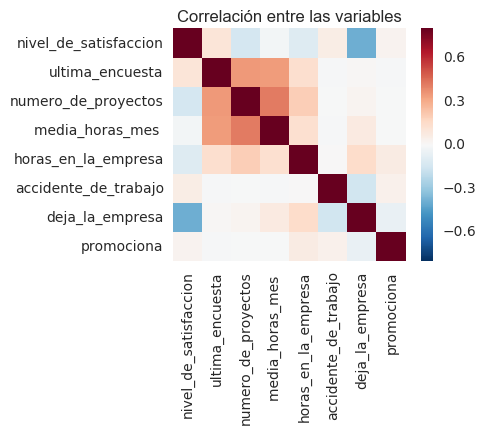

In [67]:
import seaborn as sns

f, ax = plt.subplots(figsize=(4, 3))
# mapa de calor 
sns.heatmap(corrmat, vmax=.8, square=True);
ax.set_title('Correlación entre las variables')

Podemos visualizar la matriz de correlación por salarios. Para ello lo que hacemos es dividir los datos en tres partes:
* los datos de los empleados con salario `low`
* los datos de los empleados con salario `medium`
* los datos de los empleados con salario `high`

In [68]:
# datos de los empleados con salario `low`
mascara_low = tabla['salario'] == 'low'
mascara_low
salario_low = tabla[mascara_low]
len(salario_low)

7314

In [69]:
# datos de los empleados con salario `medium`
mascara_medium = tabla['salario'] == 'medium'
mascara_medium
salario_medium = tabla[mascara_medium]
len(salario_medium)

6446

In [70]:
# datos de los empleados con salario `high`
mascara_high = tabla['salario'] == 'high'
mascara_high
salario_high = tabla[mascara_high]
len(salario_high)

1237

In [71]:
corrmat_low = salario_low.corr()
corrmat_medium = salario_medium.corr()
corrmat_high = salario_high.corr()

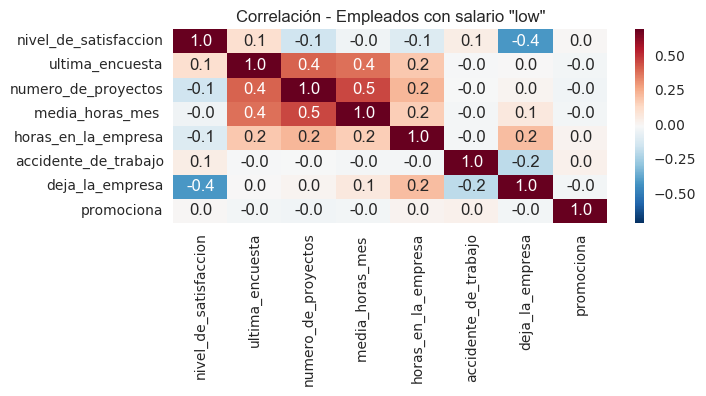

In [72]:
# mapa de calor 
f, ax = plt.subplots(figsize=(7, 2.5))
ax = sns.heatmap(corrmat_low, vmax=.7, square=False, annot=True, fmt='.1f');
ax.set_title('Correlación - Empleados con salario "low"');

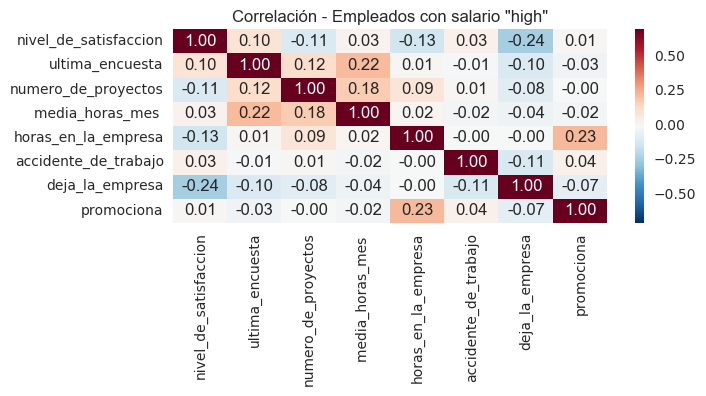

In [73]:
# mapa de calor 
f, ax = plt.subplots(figsize=(7, 2.5))
ax = sns.heatmap(corrmat_high, vmax=.7, square=False, annot=True, fmt='.2f')
ax.set_title('Correlación - Empleados con salario "high"');

# 2. Maching Learning

__Scikit-learn__ es una librería que incluye la implementación de un gran número de algoritmos de apredizaje, siendo básica para trabajar con __ML__.

La podemos utilizar para realizar _clasificaciones_, _extraccion de características, _regresiones_, _agrupaciones_, _reducción de dimensiones_, _selección de modelos_ o _preprocesamiento_.

Esta librería también nos facilita las tareas de evaluación, diagnostico y validaciones cruzadas ya que nos proporciona varios métodos de fábrica para poder realizar estas tareas de forma muy simple.

¿Se puede predecir la característica `deja_la_empresa` a partir del resto de los datos?

`deja_la_empres` = 1

In [74]:

from sklearn.preprocessing import LabelEncoder
#from   sklearn.model_selection import train_test_split       # sustituye a cross_validation
from sklearn.cross_validation import train_test_split         # desapare en la versión 0.20
# importando el modelo de regresión logística


from sklearn.calibration import CalibratedClassifierCV
from sklearn.feature_selection import SelectFromModel;

C:\Users\Yoli\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Lo primero que hacemos es convertir las variables categóricas en variables indicadoras. Lo hacemos mediante la función __get_dummies()__.

In [75]:
tabla = pd.read_csv('./datos/HR_comma.csv')
tabla = tabla.dropna()                             # borramos las observaciones con NaN

# variables categóricas en variables indicadoras
tabla_copy = pd.get_dummies(tabla)                 # guardamos el resultado en una copia
tabla_copy.head()

,nivel_de_satisfaccion,ultima_encuesta,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep_IT,dep_RandD,...,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical,salario_high,salario_low,salario_medium
0,0.38,0.53,2.0,157,3,0,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.80,0.86,5.0,262,6,0,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.72,0.87,5.0,223,5,0,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0.41,0.50,2.0,153,3,0,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,0.10,0.77,6.0,247,4,0,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [76]:
tabla_copy.info()      # No hay NaN en la tabla

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14994 entries, 0 to 14998
Data columns (total 21 columns):
nivel_de_satisfaccion    14994 non-null float64
ultima_encuesta          14994 non-null float64
numero_de_proyectos      14994 non-null float64
media_horas_mes          14994 non-null int64
horas_en_la_empresa      14994 non-null int64
accidente_de_trabajo     14994 non-null int64
deja_la_empresa          14994 non-null float64
promociona               14994 non-null int64
dep_IT                   14994 non-null float64
dep_RandD                14994 non-null float64
dep_accounting           14994 non-null float64
dep_hr                   14994 non-null float64
dep_management           14994 non-null float64
dep_marketing            14994 non-null float64
dep_product_mng          14994 non-null float64
dep_sales                14994 non-null float64
dep_support              14994 non-null float64
dep_technical            14994 non-null float64
salario_high             14994 non-

A continuación, construimos la matriz de variables independientes `X` y la varaible dependiente `y`.

In [77]:
# y = variable dependiente
y = tabla_copy.pop('deja_la_empresa')
# X = matriz de variables independientes
X = tabla_copy

In [78]:
y.unique(), len(y)         # valores distintos de la variable y

(array([ 1.,  0.]), 14994)

In [79]:
X.head()

,nivel_de_satisfaccion,ultima_encuesta,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,promociona,dep_IT,dep_RandD,dep_accounting,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical,salario_high,salario_low,salario_medium
0,0.38,0.53,2.0,157,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.80,0.86,5.0,262,6,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.72,0.87,5.0,223,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0.41,0.50,2.0,153,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,0.10,0.77,6.0,247,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [80]:
len(X)

14994

Para aplicar el modelo de regresión logística, el tipo de los datos (y, X) ha de ser array de NumPy.

In [81]:
type(y), type(X)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

Nos quedamos con los valores de la Serie y del DataFrame

In [82]:
y = y.values
X = X.values

In [83]:
type(y), type(X)

(numpy.ndarray, numpy.ndarray)

Dividimos los datasets en entrenamiento y evaluación:

In [84]:
# Xtrain con el 80% de los datos
# Xtest  con el 20 de los datos
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20)
len(Xtest), len(Xtest)/len(X),len(Xtrain), len(Xtrain)/len(X)

(2999, 0.20001333866880086, 11995, 0.7999866613311991)

## 2.1 Modelo de regresión logística

Creamos el modelo de regresión logística

In [85]:
from sklearn.linear_model import LogisticRegression

# Creando el modelo
modelo_rl = LogisticRegression()    
# Ajustando el modelo
modelo_rl.fit(Xtrain, ytrain)

# Realizando las predicciones
y_predic_test = modelo_rl.predict(Xtest) 


Podemos preguntar por la bondad del ajuste con la función __score__. Como podemos ver a continuación, el ajuste es mejor 

In [86]:
# calculamos las bondad del ajuste para los datos de test y de entrenamiento
ajuste_test = modelo_rl.score(Xtest, ytest)      #coef de determinación o bondad del ajuste
print('Bondad del ajuste con RL: ', ajuste_test)

Bondad del ajuste con RL:  0.791263754585


## 2.2 Predicción con Arboles de decisión

In [87]:
# Importando el arbol de decisión
from sklearn.tree import DecisionTreeClassifier

# Creando el modelo. Árboles con profundidad 3
modelo_ad = DecisionTreeClassifier(max_depth = 3 )     # Creando el modelo
# Ajustando el modelo
modelo_ad.fit(Xtrain, ytrain);


In [88]:
# calculamos las bondad del ajuste para los datos de test y de entrenamiento
ajuste_test = modelo_ad.score(Xtest, ytest)      #coef de determinación o bondad del ajuste
print('Bondad del ajuste con Árbol de decisión: ', ajuste_test)

Bondad del ajuste con Árbol de decisión:  0.948982994331


## 2.3 Predicción con Random Forest

Uno de los métodos más populares usados por los científicos de datos es el algoritmo __Random Forest__, uno de los mejores algoritmos de clasificación, capaz de organizar grandes cantidades de datos con exactitud.

In [89]:
# Importando el random forest
from sklearn.ensemble import RandomForestClassifier

# Creando el modelo
modelo_rf = RandomForestClassifier()
# Ajustando el modelo
modelo_rf.fit(Xtrain, ytrain)

# Realizando las predicciones
y_predic_test = modelo_rf.predict(Xtest)


In [90]:
# calculamos las bondad del ajuste para los datos de test y de entrenamiento
ajuste_test = modelo_rf.score(Xtest, ytest)      #coef de determinación o bondad del ajuste
print('Bondad del ajuste con Random Forest: ', ajuste_test)

Bondad del ajuste con Random Forest:  0.985661887296


Parece que el modelo Random forest ofrece mejores resultados. Además podemos conocer las características que más influyen en el modelo. 
En nuestro ejemplo tenemos 20 características: 

In [91]:
tabla_copy.shape

(14994, 20)

In [92]:
# nombres de las características
caracteristicas = tabla_copy.columns.values      
caracteristicas

array(['nivel_de_satisfaccion', 'ultima_encuesta', 'numero_de_proyectos',
       'media_horas_mes ', 'horas_en_la_empresa', 'accidente_de_trabajo',
       'promociona', 'dep_IT', 'dep_RandD', 'dep_accounting', 'dep_hr',
       'dep_management', 'dep_marketing', 'dep_product_mng', 'dep_sales',
       'dep_support', 'dep_technical', 'salario_high', 'salario_low',
       'salario_medium'], dtype=object)

In [93]:
# estimación de la importancia de las características
# el valor más alto corresponde a la característica más importante
estimacion = modelo_rf.feature_importances_
estimacion

array([ 0.30036273,  0.12973296,  0.19118078,  0.15181507,  0.17234487,
        0.01329172,  0.00190942,  0.0019667 ,  0.00252553,  0.00260253,
        0.00134798,  0.00232286,  0.00129802,  0.00103884,  0.00394767,
        0.00313684,  0.00416845,  0.00704909,  0.00390025,  0.0040577 ])

Emparejamos cada característica con su estimación:

In [94]:
estimaciones = dict(zip(caracteristicas, estimacion))
estimaciones
valores = pd.DataFrame(estimaciones, index = ['valor'])
valores = valores.T
valores

,valor
accidente_de_trabajo,0.013292
dep_IT,0.001967
dep_RandD,0.002526
dep_accounting,0.002603
dep_hr,0.001348
dep_management,0.002323
dep_marketing,0.001298
dep_product_mng,0.001039
dep_sales,0.003948
dep_support,0.003137


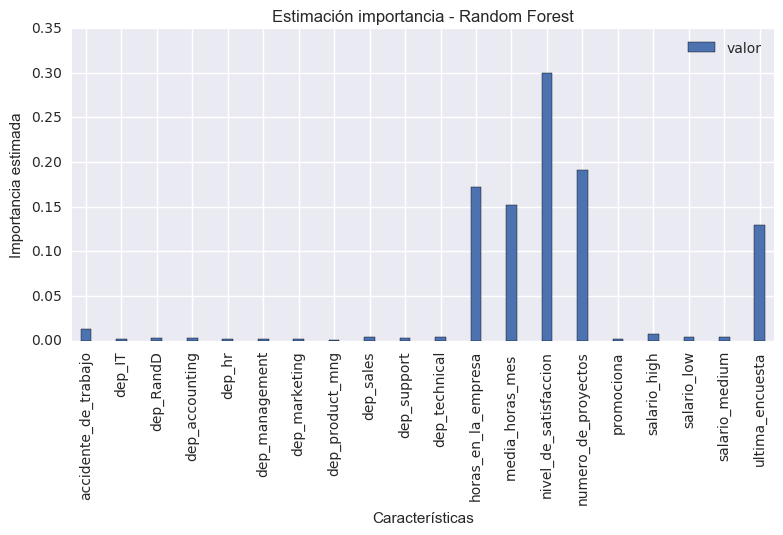

In [95]:
plt.figure(figsize=(5, 3))
valores.plot(kind = 'bar',  
             width = 0.3  ,         #anchura de las barras
             align = 'center'
             )
plt.title('Estimación importancia - Random Forest')
plt.ylabel('Importancia estimada')
plt.xlabel('Características')
plt.legend(loc='best')
plt.tight_layout()

# References



* [Python Data Analysis Library](http://pandas.pydata.org/)
* [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)
